# 矩阵分解
## 简述
   矩阵分解(Matrix Factorization，MF)技术实际上就是把用户-项目评分矩阵分解为若干个部分的组合。基于矩阵分解的推荐算法本质上是一种基于模型的协同过滤推荐算法。
   基于矩阵分解的推荐算法,实现简单，预测准确度高,扩展性强，在一定程度上缓解了数据的稀疏性问题，但可解释性差。

## 隐含语义分析技术
   随着用户和项目数量的急剧增长,用户和项目之间评分矩阵的维度也在在急剧增加。而由此带来的问题是计算用户与用户、项目与项目之间相似度矩阵的速度越来越慢，计算问题成为推荐系统的瓶颈。此外，随着评分矩阵越来越稀疏，推荐精度也会受到严重的影响。
   对推荐系统研究过程中有很多人提出给用户或项目进行分类，但是根据传统的推荐算法很难真正发掘出用户用户潜在的兴趣度。为了解决这个问题研究人员提出从数据出发，自动找出项目的分类信息和用户的兴趣度信息。因此，隐含语义分析技术(Latent Variable Analysis）就出现了。
   协同过滤算法的特点就是完全没有利用到物品本身或者是用户自身的属性，仅仅利用了用户与物品的交互信息就可以实现推荐，是一个可解释性很强，非常直观的模型，但是也存在一些问题， 第一个就是处理稀疏矩阵的能力比较弱，所以为了使得协同过滤更好处理稀疏矩阵问题， 增强泛化能力， 从协同过滤中衍生出矩阵分解模型或者叫隐语义模型, 两者差不多说的一个意思，就是在协同过滤共现矩阵的基础上， 使用更稠密的隐向量表示用户和物品，挖掘用户和物品的隐含兴趣和隐含特征，在一定程度上弥补协同过滤模型处理稀疏矩阵能力不足的问题。
### 隐语义模型
   核心思想是通过隐含特征（latent factor）联系用户兴趣和物品（item）， 基于用户的行为找出潜在的主题和分类， 然后对item进行自动聚类，划分到不同类别/主题(用户的兴趣)。
   例如：如果我们知道了用户A和用户B两个用户在豆瓣的读书列表， 从他们的阅读列表可以看出，用户A的兴趣涉及侦探小说、科普图书以及一些计算机技术书， 而用户B的兴趣比较集中在数学和机器学习方面。 那么如何给A和B推荐图书呢？
如果采用协同过滤算法，那么：
+ 对于UserCF，首先需要找到和他们看了同样书的其他用户（兴趣相似的用户），然后给他们推荐那些用户喜欢的其他书。
+ 对于ItemCF，需要给他们推荐和他们已经看的书相似的书，比如作者B看了很多关于数据挖掘的书，可以给他推荐机器学习或者模式识别方面的书。

而如果是隐语义模型的话， 它会先通过一些角度把用户兴趣和这些书归一下类， 当来了用户之后， 首先得到他的兴趣分类， 然后从这个分类中挑选他可能喜欢的书籍。
    这里就看到了隐语义模型和协同过滤的不同， 这里说的角度其实就是这个隐含特征， 比如书籍的话它的内容、作者、年份、主题等都可以算隐含特征。

   下面拿一个音乐评分的例子来具体看一下隐特征矩阵的含义。
   假设每个用户都有自己的听歌偏好， 比如A喜欢带有小清新的， 吉他伴奏的， 王菲的歌曲，如果一首歌正好是王菲唱的， 并且是吉他伴奏的小清新， 那么就可以将这首歌推荐给这个用户。 也就是说是小清新， 吉他伴奏， 王菲这些元素连接起了用户和歌曲。 当然每个用户对不同的元素偏好不同， 每首歌包含的元素也不一样， 所以我们就希望找到下面的两个矩阵：
1. 潜在因子—— 用户矩阵Q
这个矩阵表示不同用户对于不同元素的偏好程度，1代表很喜欢，0代表不喜欢，如下图：
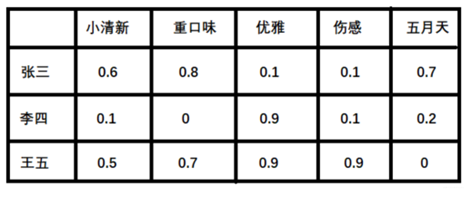
2. 潜在因子——音乐矩阵P
表示每种音乐含有各种元素的成分，比如下表中，音乐A是一个偏小清新的音乐， 含有小清新的Latent Factor的成分是0.9，重口味的成分是0.1，优雅成分0.2，等等
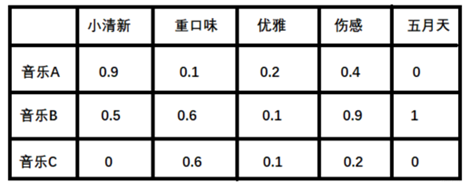

   利用上面的这两个矩阵， 我们就能得出张三对音乐A的喜欢程度： 
   张三对小清新的偏好 * 音乐A含有小清新的成分 + 张三对重口味的偏好 * 音乐A含有重口味的成分 + 张三对优雅的偏好 * 音乐A含有优雅的成分…
下面是对应的两个隐向量：
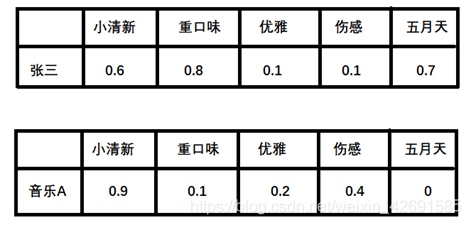
   根据隐向量其实就可以得到张三对音乐A的打分，即：
0.6∗0.9+0.8∗0.1+0.1∗0.2+0.1∗0.4+0.7∗0=0.69
按照这个计算方式， 每个用户对每首歌其实都可以得到这样的分数，最后就得到了我们的评分矩阵：
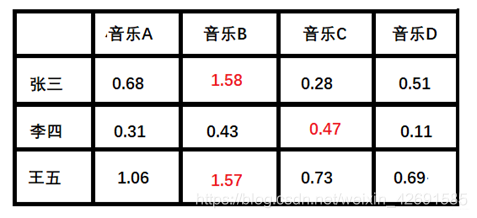
   这里的红色表示用户没有打分，我们通过隐向量计算得到的。
   上面例子中的小清晰、 重口味、 优雅这些就可以看做是隐含特征， 而通过这个隐含特征就可以把用户的兴趣和音乐的进行一个分类，其实就是找到了每个用户每个音乐的一个隐向量表达形式（embedding的原理其实也是这样，那里是找到每个词的隐向量表达），这个隐向量就可以反映出用户的兴趣和物品的风格，并能将相似的物品推荐给相似的用户等。
   但是，实际上我们是没用音乐和用户的矩阵的，因为音乐和用户都太多了，无法找到一些隐特征去fit全部的，而且每个人对音乐都会有不同的理解，对于每个用户或者每个物品的风格，我们每个人都有不同的看法。所以事实上，我们有的只有用户的评分矩阵，也就是最后的结果，并且一般这种矩阵长这样：
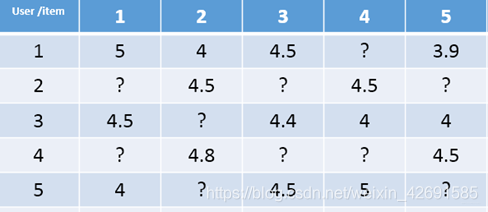
这种矩阵非常的稀疏，如果直接基于用户相似性或者物品相似性去填充这个矩阵是不太容易的。使用矩阵分解就可以比较容易的解决这个问题。
矩阵分解模型其实就是在想办法基于这个评分矩阵去找到上面例子中的那两个矩阵， 也就是用户兴趣和物品的隐向量表达， 然后就把这个评分矩阵分解成Q和P两个矩阵乘积的形式， 这时候就可以基于这两个矩阵去预测某个用户对某个物品的评分了。 然后基于这个评分去进行推荐。这就是矩阵分解算法的原理。

### 矩阵分解算法
   在矩阵分解的算法框架下， 我们就可以通过分解协同过滤的共现矩阵来得到用户和物品的隐向量， 就是上面的用户矩阵Q和物品矩阵P，这也是“矩阵分解”名字的由来。
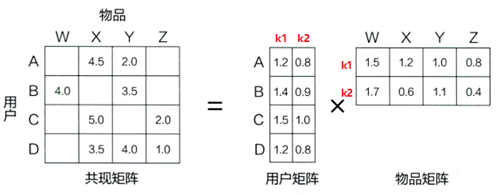
   矩阵分解算法将$m \times n$维的共享矩阵$R$ 分解成$m \times k$维的用户矩阵$U$和$k\times n$维的物品矩阵$V$相乘的形式。其中$m$是用户数量，$n$是物品数量，$k$是隐向量维度，也就是隐含特征个数，只不过这里的隐含特征变得不可解释了，即我们不知道具体含义了，要模型自己去学。$k$的大小决定了隐向量表达能力的强弱，$k$越大，表达信息就越强，理解起来就是把用户的兴趣和物品的分类划分的越具体。
那么如果有了用户矩阵和物品矩阵的话，我们就知道了如果想计算用户 u 对物品 i 的评分，只需要
$$ \operatorname{Preference}(u, i)=r_{u i}=p_{u}^{T} q_{i}=\sum_{f=1}^{F} p_{u, k} q_{k,i} $$
这里的$p_u$就是用户$u$的隐向量， 就类似与上面的张三向量， 注意这是列向量， $q_i$是物品$i$的隐向量， 就类似于上面的音乐A向量， 这个也是列向量， 所以才用了$p_{u}^{T} q_{i}$得到了一个数， 也就是用户的最终评分， 计算过程其实和上面例子中一样。 这里的$p_{u,k}$和$q_{i,k}$是模型的参数， 也正是我们想办法要计算的， $p_{u,k}$度量的是用户$u$的兴趣和第$k$个隐类的关系， 而$q_{i,k}$度量了第$k$个隐类和物品$i$之间的关系。

### 矩阵分解算法的求解
谈到矩阵分解， 最常用的方法是特征值分解(EVD)或者奇异值分解(SVD）。但是这两种方式在这里不适用：首先是EVD， 它要求分解的矩阵是方阵， 显然用户-物品矩阵不满足这个要求， 而传统的SVD分解， 会要求原始矩阵是稠密的， 而我们这里的这种矩阵一般情况下是非常稀疏的， 如果想用奇异值分解， 就必须对缺失的元素进行填充， 而一旦补全， 空间复杂度就会非常高， 且补的不一定对。 然后就是SVD分解计算复杂度非常高， 而我们的用户-物品矩阵非常大， 所以基本上无法使用。

### Funk-SVD
   Funk-SVD的思想很简单： 把求解上面两个矩阵的参数问题转换成一个最优化问题， 可以通过训练集里面的观察值利用最小化来学习用户矩阵和物品矩阵。
   我们上面已经知道了，如果有了用户矩阵和物品矩阵的话，我们就知道了如果想计算用户$u$对物品$i$的评分$\operatorname{Preference}(u, i)$。
   而现在， 我们有真实的$r_{u,i}$, 但是没有$p_{u}^{T} q_{i}$, 那么我们可以初始化一个啊， 随机初始化一个用户矩阵$U$和一个物品矩阵$V$， 然后不就有$p_{u}^{T} q_{i}$了？ 当然你说， 随机初始化的肯定不准啊， 但是， 有了$p_{u}^{T} q_{i}$之后， 我们就可以计算一个猜测的$\hat{r}{u i}$, 即 $$ \hat{r}_{u i}=p_{u}^{T} q_{i} $$
   这时候， 肯定是不准， 那么这个猜测的和真实值之间就会有一个误差： $$ e_{u i}=r_{u i}-\hat{r}_{u i} $$

   有了误差， 我们就可以计算出总的误差平方和： $$ \operatorname{SSE}=\sum_{u, i} e_{u i}^{2}=\sum_{u, i}\left(r_{u i}-\sum_{k=1}^{K} p_{u,k} q_{k, i}\right)^{2} $$ 有了损失， 我们就可以想办法进行训练， 把SSE降到最小， 那么我们的两个矩阵参数就可以算出来。所以就把这个问题转成了最优化的的问题， 而我们的目标函数就是：
$$ \min {\boldsymbol{q}^{}, \boldsymbol{p}^{}} \sum{(u, i) \in K}\left(\boldsymbol{r}{\mathrm{ui}}-p{u}^{T} q_{i}\right)^{2} $$
这里的$K$表示所有用户评分样本的集合。
但在实际中， 单纯的$\hat{r}{u i}=p{u}^{T} q_{i}$也是不够的， 还要考虑其他的一些因素， 比如一个评分系统， 有些固有的属性和用户物品无关， 而用户也有些属性和物品无关， 物品也有些属性和用户无关。 因此， Netfix Prize中提出了另一种LFM， 在原来的基础上加了偏置项， 来消除用户和物品打分的偏差， 即预测公式如下： $$ \hat{r}{u i}=\mu+b{u}+b_{i}+p_{u}^{T} \cdot q_{i} $$ 这个预测公式加入了3项偏置$\mu,b_u,b_i$, 作用如下：
+ $\mu$: 训练集中所有记录的评分的全局平均数。 在不同网站中， 因为网站定位和销售物品不同， 网站的整体评分分布也会显示差异。 比如有的网站中用户就喜欢打高分， 有的网站中用户就喜欢打低分。 而全局平均数可以表示网站本身对用户评分的影响。
+ $b_u$: 用户偏差系数， 可以使用用户$u$给出的所有评分的均值， 也可以当做训练参数。 这一项表示了用户的评分习惯中和物品没有关系的那种因素。 比如有些用户比较苛刻， 对什么东西要求很高， 那么他评分就会偏低， 而有些用户比较宽容， 对什么东西都觉得不错， 那么评分就偏高
+ $b_i$: 物品偏差系数， 可以使用物品$i$收到的所有评分的均值， 也可以当做训练参数。 这一项表示了物品接受的评分中和用户没有关系的因素。 比如有些物品本身质量就很高， 因此获得的评分相对比较高， 有的物品本身质量很差， 因此获得的评分相对较低。

加了用户和物品的打分偏差之后， 矩阵分解得到的隐向量更能反映不同用户对不同物品的“真实”态度差异， 也就更容易捕捉评价数据中有价值的信息， 从而避免推荐结果有偏。

### 代码实现
仍然用之前的例子：
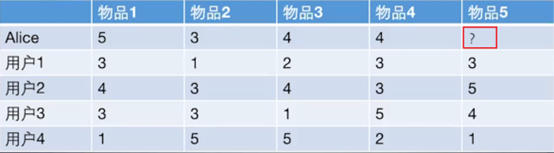
SVD在解决这个问题上是这么做的： 
1. 首先，它会先初始化用户矩阵P和物品矩阵Q， P的维度是[users_num, F], Q的维度是[item_nums, F]，这个F是隐向量的维度。 也就是把通过隐向量的方式把用户的兴趣和F的特点关联了起来。初始化这两个矩阵的方式很多， 但根据经验， 随机数需要和1/sqrt(F)成正比下面代码中会发现。 
2. 有了两个矩阵之后，我就可以根据用户已经打分的数据去更新参数，这就是训练模型的过程，方法很简单，就是遍历用户，对于每个用户，遍历它打分的物品，这样就拿到了该用户和物品的隐向量， 然后两者相乘加上偏置就是预测的评分， 这时候与真实评分有个差距， 根据上面的梯度下降就可以进行参数的更新。

这样训练完之后，我们就可以得到用户Alice和物品5的隐向量，根据这个就可以预测Alice对物品5的打分。下面的代码的逻辑就是上面这两步，这里使用带有偏置项和正则项的那个SVD算法

In [6]:
import pandas as pd
import numpy as np
import warnings
import random, math, os

In [7]:
class SVD():
    def __init__(self, rating_data, F=5, alpha=0.1, lmbda=0.1, max_iter=100):
        self.F = F           # 这个表示隐向量的维度
        self.P = dict()          #  用户矩阵P  大小是[users_num, F]
        self.Q = dict()     # 物品矩阵Q  大小是[item_nums, F]
        self.bu = dict()   # 用户偏差系数
        self.bi = dict()    # 物品偏差系数
        self.mu = 0.0        # 全局偏差系数
        self.alpha = alpha   # 学习率
        self.lmbda = lmbda    # 正则项系数
        self.max_iter = max_iter    # 最大迭代次数
        self.rating_data = rating_data # 评分矩阵
        
        # 初始化矩阵P和Q, 方法很多， 一般用随机数填充， 但随机数大小有讲究， 根据经验， 随机数需要和1/sqrt(F)成正比
        cnt = 0    # 统计总的打分数， 初始化mu用
        for user, items in self.rating_data.items():
            self.P[user] = [random.random() / math.sqrt(self.F)  for x in range(0, F)]
            self.bu[user] = 0
            cnt += len(items) 
            for item, rating in items.items():
                if item not in self.Q:
                    self.Q[item] = [random.random() / math.sqrt(self.F) for x in range(0, F)]
                    self.bi[item] = 0
        self.mu /= cnt
        
    # 有了矩阵之后， 就可以进行训练, 这里使用随机梯度下降的方式训练参数P和Q
    def train(self):
        for step in range(self.max_iter):
            for user, items in self.rating_data.items():
                for item, rui in items.items():
                    rhat_ui = self.predict(user, item)   # 得到预测评分
                    # 计算误差
                    e_ui = rui - rhat_ui
                    
                    self.bu[user] += self.alpha * (e_ui - self.lmbda * self.bu[user])
                    self.bi[item] += self.alpha * (e_ui - self.lmbda * self.bi[item])
                    # 随机梯度下降更新梯度
                    for k in range(0, self.F):
                        self.P[user][k] += self.alpha * (e_ui*self.Q[item][k] - self.lmbda * self.P[user][k])
                        self.Q[item][k] += self.alpha * (e_ui*self.P[user][k] - self.lmbda * self.Q[item][k])
                    
            self.alpha *= 0.1    # 每次迭代步长要逐步缩小
    
    # 预测user对item的评分， 这里没有使用向量的形式
    def predict(self, user, item):
        return sum(self.P[user][f] * self.Q[item][f] for f in range(0, self.F)) + self.bu[user] + self.bi[item] + self.mu   

In [11]:
# 定义数据集， 也就是那个表格， 注意这里我们采用字典存放数据， 因为实际情况中数据是非常稀疏的， 很少有情况是现在这样
rating_data={1: {'A': 5, 'B': 3, 'C': 4, 'D': 4},
        2: {'A': 3, 'B': 1, 'C': 2, 'D': 3, 'E': 3},
        3: {'A': 4, 'B': 3, 'C': 4, 'D': 3, 'E': 5},
        4: {'A': 3, 'B': 3, 'C': 1, 'D': 5, 'E': 4},
        5: {'A': 1, 'B': 5, 'C': 5, 'D': 2, 'E': 1}
 }
# 接下来就是训练和预测
basicsvd = SVD(rating_data, F=10)
basicsvd.train()
for item in ['E']:
    print(item, basicsvd.predict(1, item))

E 3.344818952917944


通过这个方式，得到的预测评分是3.344818952917944，这个和隐向量的维度，训练次数和训练方式有关。

### 优缺点
#### 优点
+ 泛化能力强：一定程度上解决了稀疏问题
+ 空间复杂度低：由于用户和物品都用隐向量的形式存放，少了用户和物品相似度矩阵，空间复杂度由n^2降到了(n+m)*f
+ 更好的扩展性和灵活性：矩阵分解的最终产物是用户和物品隐向量，这个深度学习的embedding思想不谋而合，因此矩阵分解的结果非常便于与其他特征进行组合和拼接，并可以与深度学习无缝结合。
#### 缺点
矩阵分解算法依然是只用到了评分矩阵，没有考虑到用户特征，物品特征和上下文特征，这使得矩阵分解丧失了利用很多有效信息的机会，同时在缺乏用户历史行为的时候，无法进行有效的推荐。所以为了解决这个问题，逻辑回归模型及因子分解机模型，凭借其天然的融合不同特征的能力，逐渐在推荐系统领域得到了更广泛的应用。